# FastText Embeddings for Persian Language

* Trained on ``OSCAR`` dataset

* Vector Size ``100``


### Installing FastText

In [1]:
!git clone https://github.com/facebookresearch/fastText.git 

Cloning into 'fastText'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 3826 (delta 1), reused 4 (delta 0), pack-reused 3814
Receiving objects: 100% (3826/3826), 8.21 MiB | 15.79 MiB/s, done.
Resolving deltas: 100% (2402/2402), done.


In [2]:
!cd fastText && pip install .

Processing /content/fastText
  Created wheel for fasttext: filename=fasttext-0.9.2-cp36-cp36m-linux_x86_64.whl size=3012853 sha256=b184dd3d088b50344e1df834fc35d1a072f25dd8cbcf72fb712633b2b85bac3f
  Stored in directory: /tmp/pip-ephem-wheel-cache-52wqc9b3/wheels/a1/9f/52/696ce6c5c46325e840c76614ee5051458c0df10306987e7443
Successfully built fasttext


## ⚠️ RESTART KERNEL

Before Continuing, You have to restart the Runtime

## Get The Model

In [0]:
SKIPGRAM_MODEL_FILE_ID = '1wPnMG9_GNUVdSgbznQziQc5nMWI3QKNz'
CBOW_MODEL_FILE_ID = '1cQP10CGV6kAwmRuESJ5RTsgHq5TveXwV'

In [4]:
# Let's explore the SKIPGRAM Model

!gdown --id $SKIPGRAM_MODEL_FILE_ID 

Downloading...
From: https://drive.google.com/uc?id=1wPnMG9_GNUVdSgbznQziQc5nMWI3QKNz
To: /content/farsi-dedup-skipgram.bin
4.37GB [00:52, 83.5MB/s]


## Load the Model

In [2]:
import fasttext.util
# loading the Model
model_skipgram = fasttext.load_model('farsi-dedup-skipgram.bin')

# Getting Nearest Words, for word ``سگ``
``Dog`` in persian is ``سگ``


![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/a/a8/Lava_the_sled_dog.jpg/800px-Lava_the_sled_dog.jpg)

Image taken from [here](https://commons.wikimedia.org/wiki/File:Lava_the_sled_dog.jpg)

In [3]:
model_skipgram.get_nearest_neighbors('سگ', 25)

[(0.782295823097229, 'روتوایلر'),
 (0.7789124250411987, 'توله'),
 (0.7602617144584656, 'شیتزو'),
 (0.758849024772644, 'گربه'),
 (0.7493144273757935, 'بولداگ'),
 (0.7487086653709412, 'پامرانیان'),
 (0.7453492283821106, 'چاوچاو'),
 (0.7400702834129333, 'تریر'),
 (0.7363772988319397, 'پامرانیا'),
 (0.7327418923377991, 'رتوایلر'),
 (0.7243485450744629, 'پاگ'),
 (0.7216327786445618, 'روتوایلر،'),
 (0.721341609954834, '_سگ'),
 (0.719440758228302, 'ایگوانا'),
 (0.7192081212997437, 'سگسگ'),
 (0.7191919088363647, '،سگ'),
 (0.7173099517822266, 'سگ،'),
 (0.7163112163543701, 'شپهرد'),
 (0.7139168977737427, 'سگ,سگ'),
 (0.7111517786979675, 'گربهء'),
 (0.7074176073074341, 'سگ\u200cهای'),
 (0.7066739201545715, '.سگ'),
 (0.7048391699790955, 'دوبرمن'),
 (0.7031064033508301, 'روتوایلر...'),
 (0.7029660940170288, 'قدرجونی')]

Results are very interesting, for example, different kinds of dog breeds are very close to the word "Dog" itself.



| Persian   	| English    	|
|-----------	|------------	|
| بولداگ    	| Bulldog    	|
| پاگ       	| Pag        	|
| پامرانیا  	| Pamranya   	|
| پامرانیان 	| Pamranyan  	|
| تریر      	| Terrier    	|
| چاوچاو    	| chạwchạw   	|
| دوبرمن    	| Doberman   	|
| رتوایلر   	| Rtvaylr    	|
| روتوایلر  	| Rottweiler 	|
| شپهرد     	| Shepherd   	|
| شیتزو     	| Shih Tzu   	|
| قدرجونی   	| Qdrjvny    	|


More interstingly, you can also see ``Cat`` (``گربه``)  and  ``Iguana ``  (``ایگوانا``) in the results 

## Do some plotting

In [0]:
! pip install arabic_reshaper
! pip install python-bidi

In [0]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

from bidi.algorithm import get_display

import arabic_reshaper

import pandas as pd

In [0]:
words =  [
'ایگوانا' , 
'اسب',
'خر',
'الاغ',
'تمساح',
'شتر',
'گربه',
'پلنگ' ,
'روباه' ,
'موزخوار' ,
'گوزن' ,
'مرغ ' ,
'لاک‌پشت' ,
'شیر' ,
'زرافه',
'عقاب' ,
'بوفالو' ,
'ببر' ,
'غزال' ,
'وشق' ,
'گرگ' ,
'لک‌لک' ,
'کیوی' ,
'جگوار' ,
'گاو' ,
'دودو' ,
'کبک' ,
'شنقار' ,
'درازدامن' ,
'دلفین' ,
'خرس' ,
'صدف‌خوار' ,
'دجاج', 
'بوقلمون', 
'لانه‌کن', 
'سمور', 
'کرکس', 
'توکان', 
'تاکین', 
'تاپیر بیرد', 
'ویسنت', 
'ماهی', 
'شترمرغ', 
'طاووس'
]

In [0]:
def plot_from_df(df, plot_title="", label_distance=1):
  with sns.axes_style("whitegrid"):
    ax = sns.lmplot('Component 1', # Horizontal axis
                    'Component 2', # Vertical axis
                    data=df, # Data source
                    fit_reg=False, # Don't fix a regression line
                    height = 7,
                    aspect =2 ) # size and dimension

    plt.title(plot_title)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')

    # Source: https://stackoverflow.com/questions/46027653/adding-labels-in-x-y-scatter-plot-with-seaborn
    def label_point(x, y, val, ax):
      a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
      for i, point in a.iterrows():
        ax.text(point['x']+(label_distance*0.05), point['y']+(label_distance*0.05), get_display(arabic_reshaper.reshape(str.encode(point['val'], 'utf-8').decode())) )

    label_point(df['Component 1'], df['Component 2'], df['Word'], plt.gca()) 

    plt.show()

In [0]:
# Get embedding for each word
embeddings = [model_skipgram[w] for w in words]

# PCA

In [0]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [0]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(embeddings)

principalDf = pd.DataFrame( {'Word': pd.Series(words, dtype=str),
      'Component 1': pd.Series(principalComponents[:,0], dtype=float),
      'Component 2': pd.Series(principalComponents[:,1], dtype=float)})

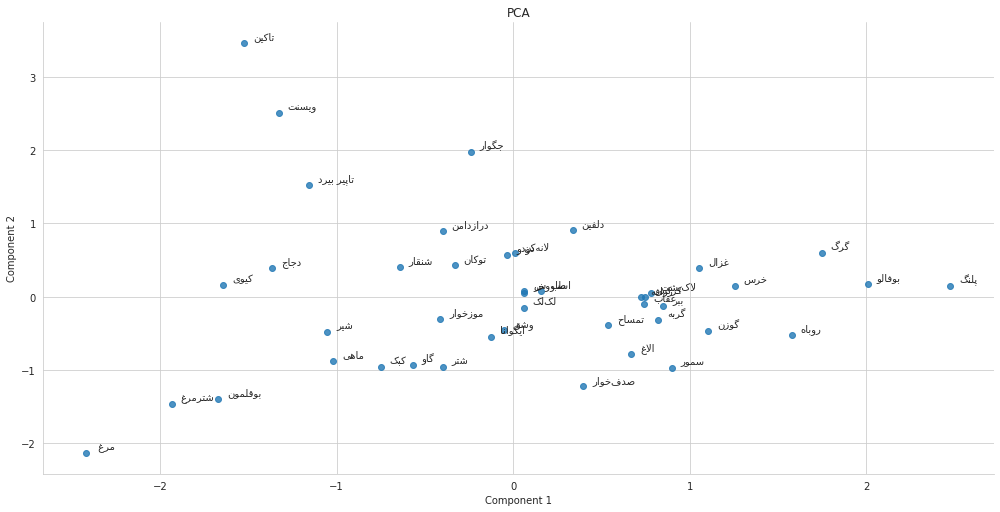

In [11]:
plot_from_df(principalDf, "PCA")

# t-SNE

In [0]:
from sklearn.manifold import TSNE

In [13]:
tsne = TSNE(n_components=2, verbose=1, perplexity=5, n_iter=1000)

tsne_results = tsne.fit_transform(embeddings)
tsneDf = pd.DataFrame( {'Word': pd.Series(words, dtype=str),
      'Component 1': pd.Series(tsne_results[:,0], dtype=float),
      'Component 2': pd.Series(tsne_results[:,1], dtype=float)})


[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 44 samples in 0.002s...
[t-SNE] Computed neighbors for 44 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 44 / 44
[t-SNE] Mean sigma: 1.080821
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.916046
[t-SNE] KL divergence after 1000 iterations: 0.876413


In [14]:
tsneDf

,Word,Component 1,Component 2
0,ایگوانا,-91.826584,45.098480
1,اسب,26.676863,-132.220734
2,خر,-0.695346,-73.723679
3,الاغ,-5.944066,-119.264320
4,تمساح,-19.752426,46.634068
5,شتر,16.000875,-110.453720
6,گربه,-76.900780,48.546539
7,پلنگ,20.580557,114.023643
8,روباه,-44.781902,41.786091
9,موزخوار,83.924042,-29.970369


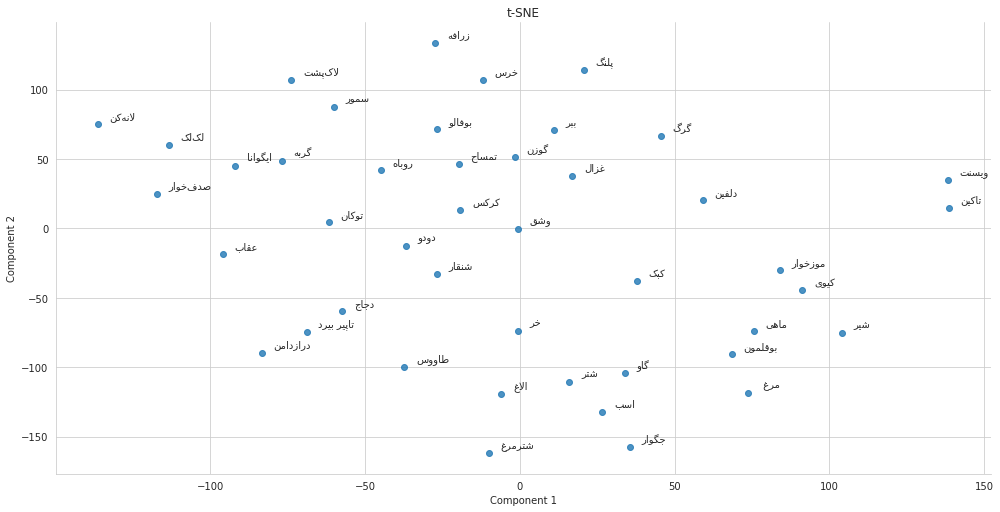

In [15]:
plot_from_df(tsneDf, plot_title="t-SNE", label_distance=75)